# KNN Algorithm

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In order to determine which data points are closest to a given query point, the distance between the query point and the other data points will need to be calculated. These distance metrics help to form decision boundaries, which partitions query points into different regions. Some of the commonly used distance measures are mentioned below.
1. Euclidian Distance
2. Manhattan Distance
3. Minkowski Distance
4. Hamminf Distance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing Cleaned data from Phase 1
data = pd.read_csv('Group_14_Clean_Data.csv')

In [3]:
data.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
0,562564,2020-04-18 00:00:01,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
1,562565,2020-04-18 00:00:13,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
2,562566,2020-04-18 00:00:24,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1
3,562567,2020-04-18 00:00:36,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,562568,2020-04-18 00:00:49,-0.018,8.248,8.238,-0.024,8.248,49.45,0.04,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1


In [4]:
data.describe()

,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,status
count,5.944500e+04,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000,59445.000000
mean,7.840181e+05,4.664913,8.658741,3.899663,0.943660,8.659809,68.983115,3.739762,0.431575,0.566995,0.716713,0.429237,0.006645,0.993237,0.951266,0.967247,0.498057
std,3.347723e+05,4.161390,0.619519,4.476449,1.009404,0.618701,8.159485,2.418615,0.495300,0.495496,0.450598,0.494971,0.081245,0.081957,0.215313,0.177991,0.500000
min,3.100000e+01,-0.030000,6.894000,-0.034000,-0.032000,6.892000,43.000000,0.022500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.661890e+05,-0.012000,8.158000,-0.008000,-0.020000,8.160000,62.450000,0.042500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,8.918600e+05,7.266000,8.588000,-0.004000,-0.008000,8.590000,72.950000,5.345000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,9.068430e+05,8.358000,9.006000,8.818000,2.014000,9.008000,75.475000,5.612500,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.516860e+06,10.614000,10.244000,10.246000,4.950000,10.242000,89.050000,6.980000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

In [6]:
X

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.018,8.248,8.238,-0.024,8.248,49.450,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59440,-0.012,8.484,8.466,-0.014,8.488,58.175,0.0325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
59441,-0.010,9.180,9.166,-0.018,9.182,63.650,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
59442,7.762,8.610,-0.004,0.578,8.610,77.850,5.5700,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
59443,-0.014,8.770,8.756,-0.016,8.774,55.825,0.0350,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [7]:
y

0        1
1        1
2        1
3        1
4        1
        ..
59440    0
59441    0
59442    0
59443    0
59444    0
Name: status, Length: 59445, dtype: int64

In [8]:
# Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
# Pedicting the Test data using the model trained
y_pred = knn.predict(X_test)

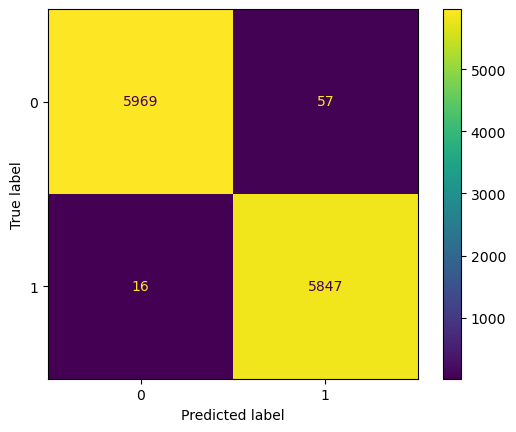

In [11]:
# Displaying the confusion matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [12]:
accuracy_score(y_test, y_pred)

0.9938598704685003

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6026
           1       0.99      1.00      0.99      5863

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889



## Choosing optimal K value

The k value in the k-NN algorithm defines how many neighbors will be checked to determine the classification of a specific query point. For example, if k=1, the instance will be assigned to the same class as its single nearest neighbor. Defining k can be a balancing act as different values can lead to overfitting or underfitting. Lower values of k can have high variance, but low bias, and larger values of k may lead to high bias and lower variance. The choice of k will largely depend on the input data as data with more outliers or noise will likely perform better with higher values of k. Overall, it is recommended to have an odd number for k to avoid ties in classification, and cross-validation tactics can help you choose the optimal k for your dataset.

In order to find the optimal K value, we are using a loop to iterate over a range of k values and training a KNN model for each k. The goal is to identify the optimal k value based on both error and accuracy metrics.

1. Looping through k values:
The loop iterates over k values ranging from 1 to 40, with increments of 2. This range is chosen to explore a variety of neighborhood sizes while avoiding unnecessary computational overhead.

2. Error Calculation:
The error for each iteration is calculated using the formula error.append(np.mean(pred_i != y_test)). This calculates the mean of the elements where the predicted values are not equal to the actual values. This provides insight into the misclassification rate for each k value.

3. Accuracy Calculation:
The accuracy for each iteration is calculated using the formula accuracy.append(accuracy_score(y_test, pred_i)). This function computes the accuracy classification score, which is the proportion of correctly classified instances. It offers a complementary perspective to the error metric.

4. Observing Graphs:
After running the loop, two graphs are generated – one for error and another for accuracy. The x-axis represents the different k values, and the y-axis represents the corresponding error or accuracy scores. By visually inspecting these graphs, one can identify the optimal k value that balances low error and high accuracy.

In [14]:
error = []
accuracy = []
# Calculating error and accuracy for K values between 1 and 40
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

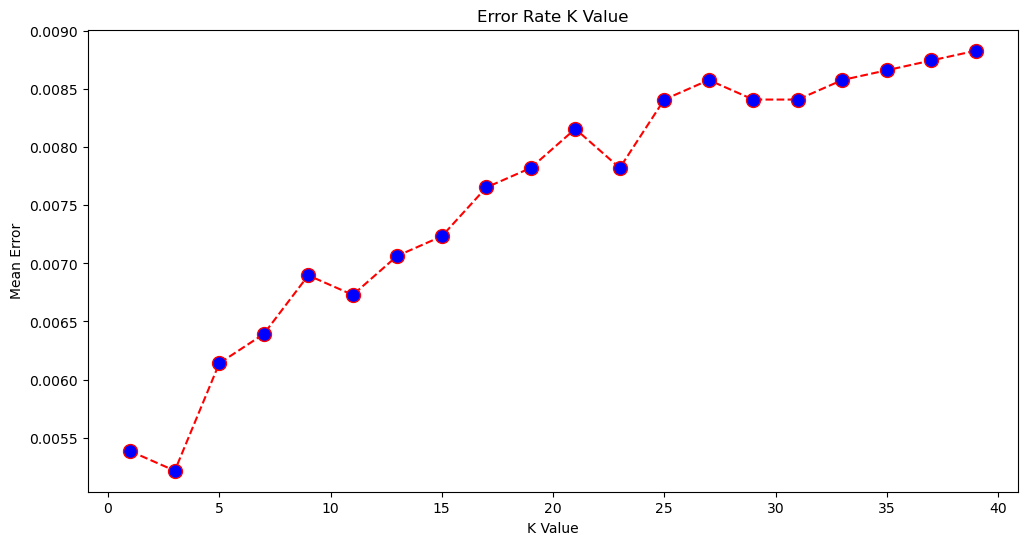

In [15]:
# Plotting the graph of K value vs Error rate
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

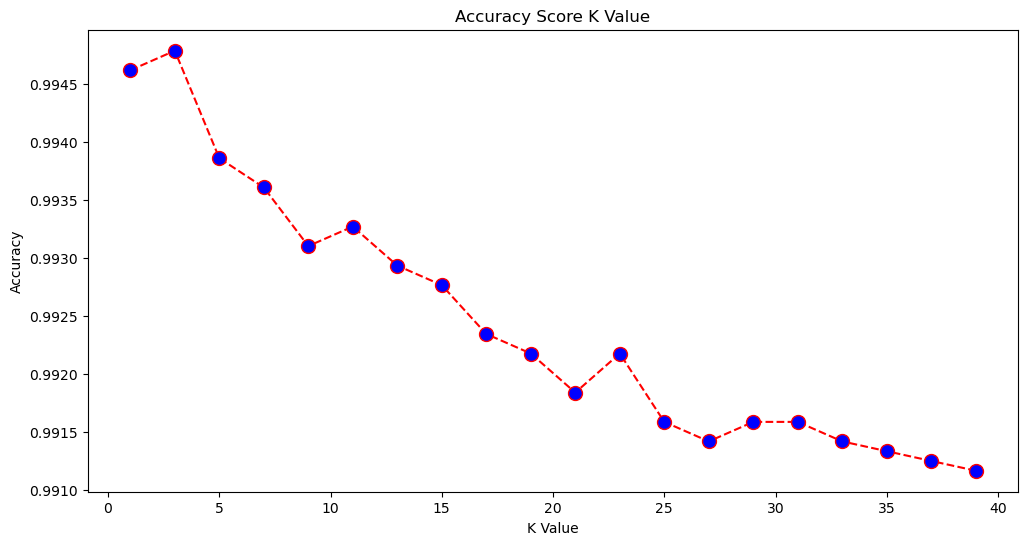

In [16]:
# Plotting the graph of K value vs Accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

After observing both the graphs, k value of 3 has achieved the highest accuracy.

In [17]:
# Using the optimal K value according to the graphs above
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred1 = knn.predict(X_test)

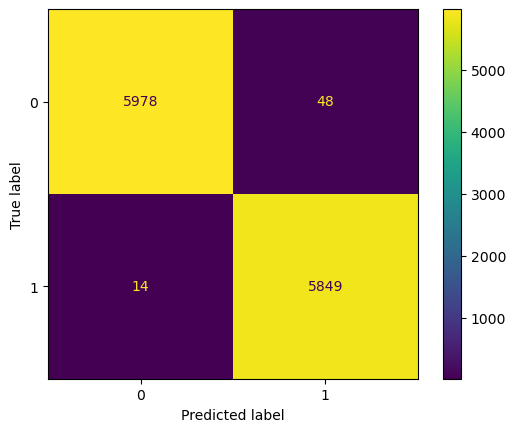

In [19]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
plt.show()

In [20]:
accuracy_score(y_test, y_pred1)

0.9947850954663975

As we can observe, there is a spike in the accuracy of the model after we replaced the K with the optimal K value obtained from the graphs

In [21]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      6026
           1       0.99      1.00      0.99      5863

    accuracy                           0.99     11889
   macro avg       0.99      0.99      0.99     11889
weighted avg       0.99      0.99      0.99     11889

